In [4]:
# import packages
import pygmt

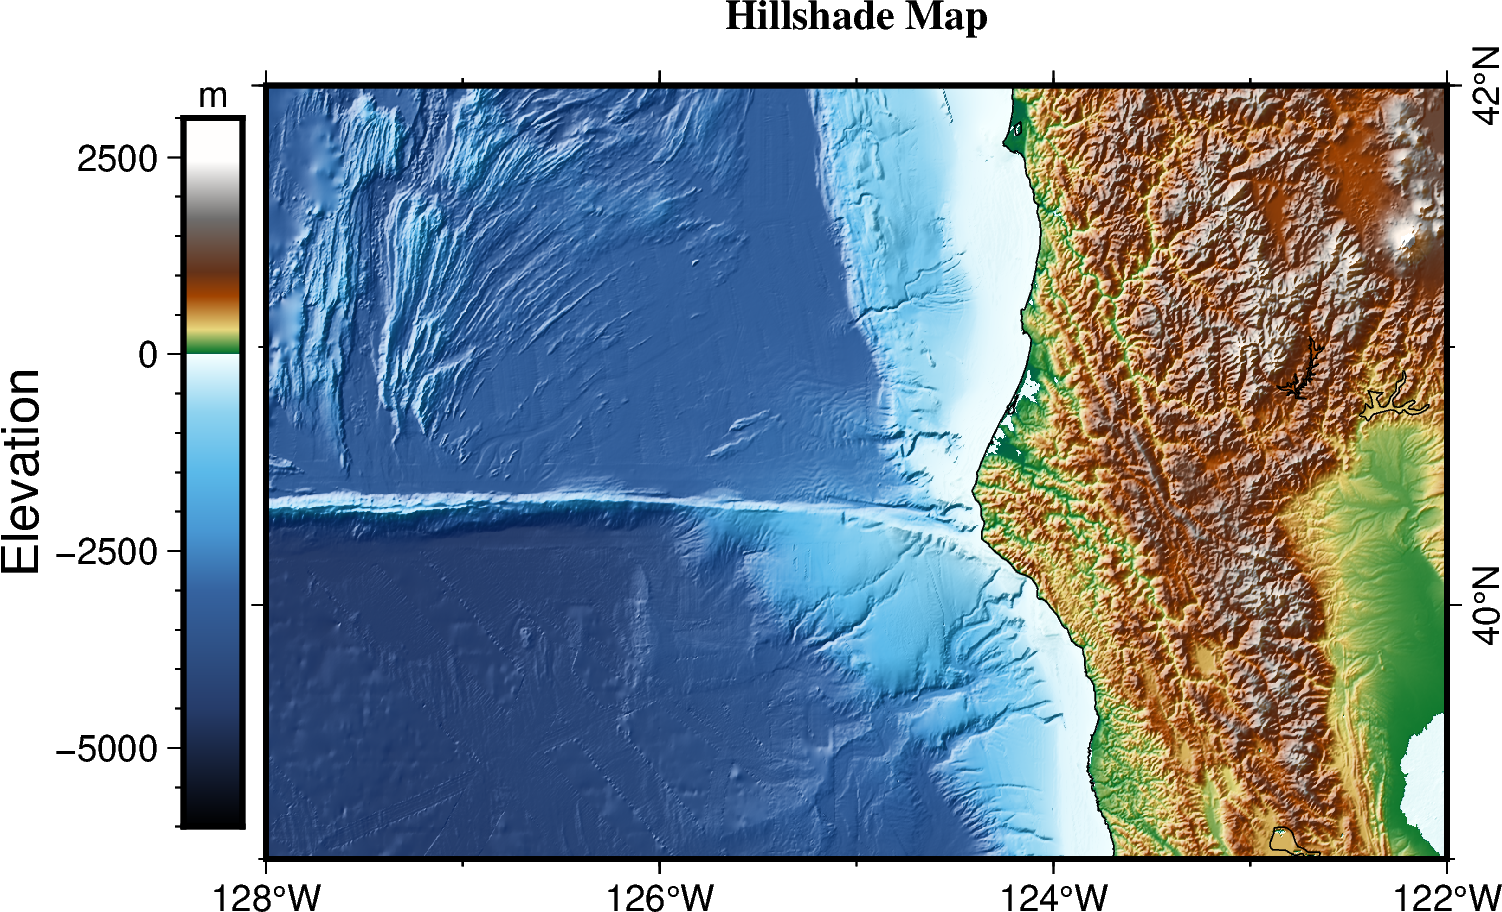

In [15]:
topo_data = "GMRTv4_2_122-128w_39-42.grd"

region=[-128, -122, 39, 42]
proj="M10c"
azi="0/90"
nor="e1"

fig = pygmt.Figure()

# Define color palette
pygmt.makecpt(cmap="geo", series=[-6000, 3000])

# Define figure configuration
with pygmt.config(
    FONT_TITLE="10p,5",
    MAP_TITLE_OFFSET="1p",
    MAP_FRAME_TYPE="plain",
    MAP_ANNOT_OBLIQUE="lat_parallel"
    ):

    # Making an intensity DataArray using azimuth and normalize parameters
    shade = pygmt.grdgradient(grid=topo_data, azimuth=azi, normalize=nor)


    fig.grdimage(
        grid=topo_data,
        region=region,
        projection=proj,
        shading=True,
        frame=['SEnw+tHillshade Map', "xa2f1", "ya2f1"],
        cmap=True,
        )
        
    # add colorbar
    fig.colorbar(
        position="JML+o0.2c/0c+w6c/0.5c", # +o: offset, +w: width
        # position="x-0.75c/0.75c+w5c/0.5c+m+v+e", # +m: text position, +v: vertical, +e: triangles outside
        frame=["a2500f500+lElevation", "y+lm"]
        )

    # add coastlines
    fig.coast(region=region, projection=proj, shorelines=True)

fig.show(dpi=300, width=1000)